## MAFS6010Z Artificial Intelligence in Fintech
<br>

#### CHAN Koon Lam 20748995
#### LAM Chung Wai 20430732
#### TANG Tsz Hong 20735194

<br>

### Project 1   CODE

- [Data preprocessing](#point1)
- [Checking missing data](#point2)
- [One-hot encoding](#point3)
- [Models](#point4)
- [ROC AUC](#point5)

## Data preprocessing <a name="point1"></a>

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
# import phik
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
### settings to display all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
### directory of the files of all .csv files
data_source_path = '/Users/quantamental/Downloads/home-credit-default-risk'

In [6]:
### Read all the .csv files
def load_all_tables(directory_path, display = True):
    if display:
        print("Loading all the tables...")
        start = time.perf_counter()
    
    global application_train, application_test, bureau, bureau_balance
    global cc_balance, installments_payments, POS_CASH_balance, previous_application
    
    application_train = pd.read_csv(os.path.join(directory_path, 'application_train.csv'))
    if display:
        print("Loaded 1 table.")
        print("Time elapsed:", time.strftime('%H:%M:%S', time.gmtime(time.perf_counter() - start)))
    application_test = pd.read_csv(os.path.join(directory_path, 'application_test.csv'))
    if display:
        print("Loaded 2 tables.")
        print("Time elapsed:", time.strftime('%H:%M:%S', time.gmtime(time.perf_counter() - start)))
    bureau = pd.read_csv(os.path.join(directory_path, 'bureau.csv'))
    if display:
        print("Loaded 3 tables.")
        print("Time elapsed:", time.strftime('%H:%M:%S', time.gmtime(time.perf_counter() - start)))
    bureau_balance = pd.read_csv(os.path.join(directory_path, 'bureau_balance.csv'))
    if display:
        print("Loaded 4 tables.")
        print("Time elapsed:", time.strftime('%H:%M:%S', time.gmtime(time.perf_counter() - start)))
    cc_balance = pd.read_csv(os.path.join(directory_path, 'credit_card_balance.csv'))
    if display:
        print("Loaded 5 tables.")
        print("Time elapsed:", time.strftime('%H:%M:%S', time.gmtime(time.perf_counter() - start)))
    installments_payments = pd.read_csv(os.path.join(directory_path, 'installments_payments.csv'))
    if display:
        print("Loaded 6 tables.")
        print("Time elapsed:", time.strftime('%H:%M:%S', time.gmtime(time.perf_counter() - start)))
    POS_CASH_balance = pd.read_csv(os.path.join(directory_path, 'POS_CASH_balance.csv'))
    if display:
        print("Loaded 7 tables.")
        print("Time elapsed:", time.strftime('%H:%M:%S', time.gmtime(time.perf_counter() - start)))
    previous_application = pd.read_csv(os.path.join(directory_path, 'previous_application.csv'))
    if display:
        print("Loaded 8 tables.")
        print("Loading completed.")
        print("Total time elapsed:", time.strftime('%H:%M:%S', time.gmtime(time.perf_counter() - start)))

In [7]:
def nan_df_create(data):
    nan_proportion = data.isna().sum() * 100 / len(data)
    df = pd.DataFrame({'column' : nan_proportion.index, 'percent' : nan_proportion.values})
    
    ### sorting the dataframe by decreasing order of percentage of NaN values
    df.sort_values(by = 'percent', ascending = False, inplace = True)
    
    return df

In [8]:
def plot_nan_percent(df_nan, title_name, tight_layout = True, figsize = (20,8), grid = False, rotation = 90):
    
    ### check if there is any column with NaNs or not.
    if df_nan.percent.sum() != 0:
        print(f"Number of columns having NaN values: {df_nan[df_nan['percent'] != 0].shape[0]} columns")
        
        #plotting the Bar-Plot for NaN percentages (only for columns with Non-Zero percentage of NaN values)
        plt.figure(figsize = figsize, tight_layout = tight_layout)
        sns.barplot(x= 'column', y = 'percent', data = df_nan[df_nan['percent'] > 0])
        plt.xticks(rotation = rotation)
        plt.xlabel('Column Name')
        plt.ylabel('Percentage of NaN values')
        plt.title(f'Percentage of NaN values in {title_name}')
        if grid:
            plt.grid()
        plt.show()
    else:
        print(f"The dataframe {title_name} does not contain any NaN values.")

In [9]:
load_all_tables(data_source_path, display = True)

Loading all the tables...
Loaded 1 table.
Time elapsed: 00:00:05
Loaded 2 tables.
Time elapsed: 00:00:06
Loaded 3 tables.
Time elapsed: 00:00:10
Loaded 4 tables.
Time elapsed: 00:00:15
Loaded 5 tables.
Time elapsed: 00:00:27
Loaded 6 tables.
Time elapsed: 00:00:44
Loaded 7 tables.
Time elapsed: 00:00:52
Loaded 8 tables.
Loading completed.
Total time elapsed: 00:01:14


In [8]:
print("The shape of training data is:", application_train.shape)
application_train.head()

The shape of training data is: (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [9]:
print("The shape of testing data is:", application_test.shape)
application_test.head()

The shape of testing data is: (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [10]:
print("Shape of the data of previous loans records is:", bureau.shape)
bureau.head()

Shape of the data of previous loans records is: (1716428, 17)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [11]:
print("The shape of previous monthly balance credits data is:", bureau_balance.shape)
bureau_balance.head()

The shape of previous monthly balance credits data is: (27299925, 3)


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [12]:
print("The shape of credit card balance data is:", cc_balance.shape)
cc_balance.head()

The shape of credit card balance data is: (3840312, 23)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [13]:
print("The shape of installments payments data is:", installments_payments.shape)
installments_payments.head()

The shape of installments payments data is: (13605401, 8)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [14]:
print("The shape of POS cash balance data is:", POS_CASH_balance.shape)
POS_CASH_balance.head()

The shape of POS cash balance data is: (10001358, 8)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [15]:
print("The shape of previous application data is:", previous_application.shape)
previous_application.head()

The shape of previous application data is: (1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## Checking missing data <a name="point2"></a>

In [16]:
application_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [17]:
t_data_des = application_train.describe()

In [18]:
t_data_des

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [10]:
num_unique_values = application_train.nunique().sort_values().to_frame(name='Number of distinct values')
num_unique_values.reset_index(level=0, inplace=True)
num_unique_values.rename({'index': 'Feature'}, axis=1, inplace=True)
num_unique_values.head()

Feature  Number of distinct values
0  LIVE_CITY_NOT_WORK_CITY                          2
1         FLAG_DOCUMENT_18                          2
2         FLAG_DOCUMENT_14                          2
3               FLAG_MOBIL                          2
4           FLAG_EMP_PHONE                          2

In [11]:
categorical_columns = ['TARGET','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
                       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                       'LIVE_CITY_NOT_WORK_CITY'] + ['FLAG_DOCUMENT_' + str(i) for i in range(2,22)] + application_train.dtypes[
                       application_train.dtypes == 'object'].index.tolist()

print("Number of categorical features:", len(categorical_columns))

Number of categorical features: 51


In [12]:
### Distinct count of categorical features
print("Number of numerical features:", t_data_des.shape[1]-len(categorical_columns), "out of", application_train.shape[1])
print("Number of categorical features:", len(categorical_columns), 
      "out of", application_train.shape[1])
print("\nCategorical columns:\n", categorical_columns)

NameError: name 't_data_des' is not defined

Number of columns having NaN values: 67 columns


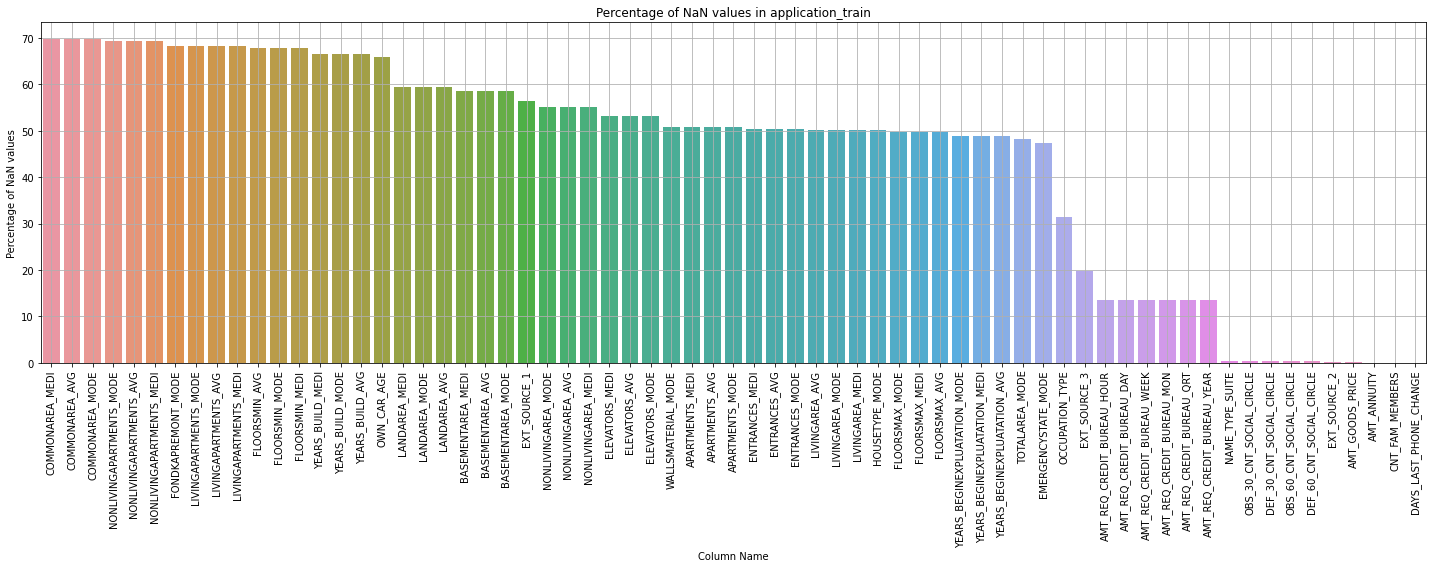

In [13]:
plot_nan_percent(nan_df_create(application_train), 'application_train', grid = True)

Number of columns having NaN values: 64 columns


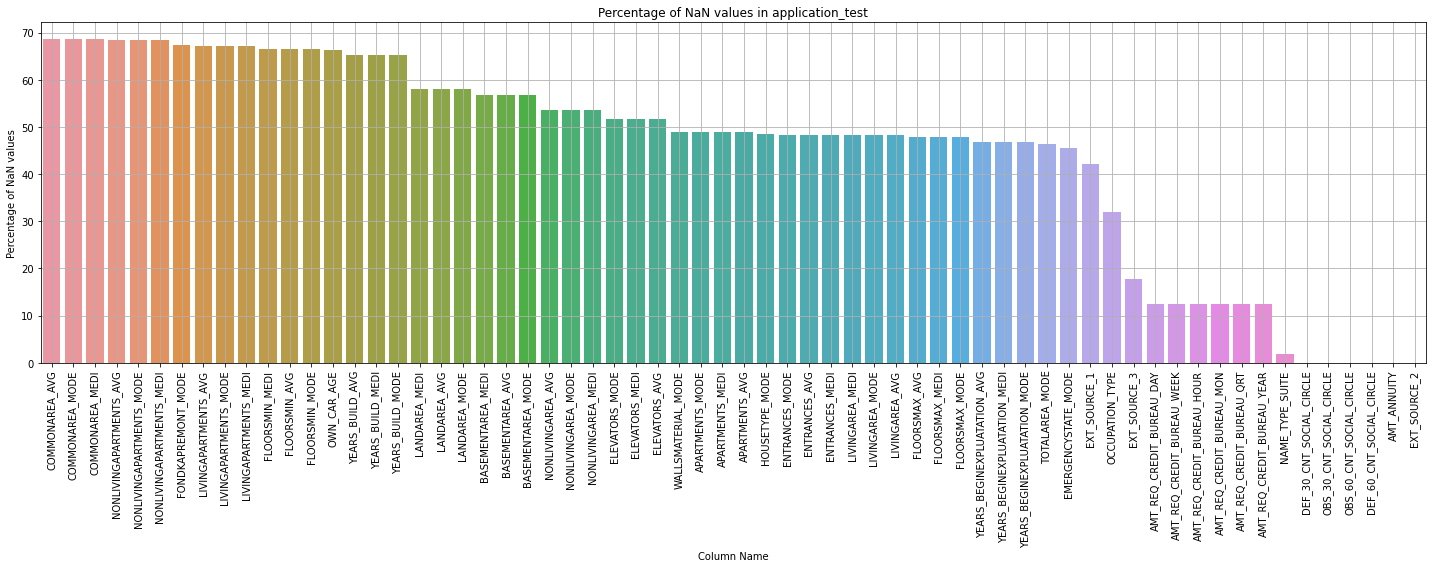

In [14]:
plot_nan_percent(nan_df_create(application_test), 'application_test', grid = True)

In [24]:
print("Percentage of missing values for each feature in training data:")
nan_df_create(application_train)[nan_df_create(application_train)['percent']>0]

Percentage of missing values for each feature in training data:


column    percent
76                COMMONAREA_MEDI  69.872297
48                 COMMONAREA_AVG  69.872297
62                COMMONAREA_MODE  69.872297
70       NONLIVINGAPARTMENTS_MODE  69.432963
56        NONLIVINGAPARTMENTS_AVG  69.432963
84       NONLIVINGAPARTMENTS_MEDI  69.432963
86             FONDKAPREMONT_MODE  68.386172
68          LIVINGAPARTMENTS_MODE  68.354953
54           LIVINGAPARTMENTS_AVG  68.354953
82          LIVINGAPARTMENTS_MEDI  68.354953
52                  FLOORSMIN_AVG  67.848630
66                 FLOORSMIN_MODE  67.848630
80                 FLOORSMIN_MEDI  67.848630
75               YEARS_BUILD_MEDI  66.497784
61               YEARS_BUILD_MODE  66.497784
47                YEARS_BUILD_AVG  66.497784
21                    OWN_CAR_AGE  65.990810
81                  LANDAREA_MEDI  59.376738
67                  LANDAREA_MODE  59.376738
53                   LANDAREA_AVG  59.376738
73              BASEMENTAREA_MEDI  58.515956
45               BASEMENTAREA_AVG  58.515956
59              BASEMENTAREA_MODE  58.515956
41                   EXT_SOURCE_1  56.381073
71             NONLIVINGAREA_MODE  55.179164
57              NONLIVINGAREA_AVG  55.179164
85             NONLIVINGAREA_MEDI  55.179164
77                 ELEVATORS_MEDI  53.295980
49                  ELEVATORS_AVG  53.295980
63                 ELEVATORS_MODE  53.295980
89             WALLSMATERIAL_MODE  50.840783
72                APARTMENTS_MEDI  50.749729
44                 APARTMENTS_AVG  50.749729
58                APARTMENTS_MODE  50.749729
78                 ENTRANCES_MEDI  50.348768
50                  ENTRANCES_AVG  50.348768
64                 ENTRANCES_MODE  50.348768
55                 LIVINGAREA_AVG  50.193326
69                LIVINGAREA_MODE  50.193326
83                LIVINGAREA_MEDI  50.193326
87                 HOUSETYPE_MODE  50.176091
65                 FLOORSMAX_MODE  49.760822
79                 FLOORSMAX_MEDI  49.760822
51                  FLOORSMAX_AVG  49.760822
60   YEARS_BEGINEXPLUATATION_MODE  48.781019
74   YEARS_BEGINEXPLUATATION_MEDI  48.781019
46    YEARS_BEGINEXPLUATATION_AVG  48.781019
88                 TOTALAREA_MODE  48.268517
90            EMERGENCYSTATE_MODE  47.398304
28                OCCUPATION_TYPE  31.345545
43                   EXT_SOURCE_3  19.825307
116    AMT_REQ_CREDIT_BUREAU_HOUR  13.501631
117     AMT_REQ_CREDIT_BUREAU_DAY  13.501631
118    AMT_REQ_CREDIT_BUREAU_WEEK  13.501631
119     AMT_REQ_CREDIT_BUREAU_MON  13.501631
120     AMT_REQ_CREDIT_BUREAU_QRT  13.501631
121    AMT_REQ_CREDIT_BUREAU_YEAR  13.501631
11                NAME_TYPE_SUITE   0.420148
91       OBS_30_CNT_SOCIAL_CIRCLE   0.332021
92       DEF_30_CNT_SOCIAL_CIRCLE   0.332021
93       OBS_60_CNT_SOCIAL_CIRCLE   0.332021
94       DEF_60_CNT_SOCIAL_CIRCLE   0.332021
42                   EXT_SOURCE_2   0.214626
10                AMT_GOODS_PRICE   0.090403
9                     AMT_ANNUITY   0.003902
29                CNT_FAM_MEMBERS   0.000650
95         DAYS_LAST_PHONE_CHANGE   0.000325

In [25]:
print("Percentage of missing values for each feature in testing data:")
nan_df_create(application_test)[nan_df_create(application_test)['percent']>0]

Percentage of missing values for each feature in testing data:


column    percent
47                 COMMONAREA_AVG  68.716150
61                COMMONAREA_MODE  68.716150
75                COMMONAREA_MEDI  68.716150
55        NONLIVINGAPARTMENTS_AVG  68.412523
69       NONLIVINGAPARTMENTS_MODE  68.412523
83       NONLIVINGAPARTMENTS_MEDI  68.412523
85             FONDKAPREMONT_MODE  67.284179
53           LIVINGAPARTMENTS_AVG  67.249302
67          LIVINGAPARTMENTS_MODE  67.249302
81          LIVINGAPARTMENTS_MEDI  67.249302
79                 FLOORSMIN_MEDI  66.605121
51                  FLOORSMIN_AVG  66.605121
65                 FLOORSMIN_MODE  66.605121
20                    OWN_CAR_AGE  66.289184
46                YEARS_BUILD_AVG  65.275726
74               YEARS_BUILD_MEDI  65.275726
60               YEARS_BUILD_MODE  65.275726
80                  LANDAREA_MEDI  57.964057
52                   LANDAREA_AVG  57.964057
66                  LANDAREA_MODE  57.964057
72              BASEMENTAREA_MEDI  56.706466
44               BASEMENTAREA_AVG  56.706466
58              BASEMENTAREA_MODE  56.706466
56              NONLIVINGAREA_AVG  53.512227
70             NONLIVINGAREA_MODE  53.512227
84             NONLIVINGAREA_MEDI  53.512227
62                 ELEVATORS_MODE  51.676104
76                 ELEVATORS_MEDI  51.676104
48                  ELEVATORS_AVG  51.676104
88             WALLSMATERIAL_MODE  49.017315
57                APARTMENTS_MODE  49.005006
71                APARTMENTS_MEDI  49.005006
43                 APARTMENTS_AVG  49.005006
86                 HOUSETYPE_MODE  48.455194
63                 ENTRANCES_MODE  48.373133
49                  ENTRANCES_AVG  48.373133
77                 ENTRANCES_MEDI  48.373133
82                LIVINGAREA_MEDI  48.317742
68                LIVINGAREA_MODE  48.317742
54                 LIVINGAREA_AVG  48.317742
50                  FLOORSMAX_AVG  47.843837
78                 FLOORSMAX_MEDI  47.843837
64                 FLOORSMAX_MODE  47.843837
45    YEARS_BEGINEXPLUATATION_AVG  46.889874
73   YEARS_BEGINEXPLUATATION_MEDI  46.889874
59   YEARS_BEGINEXPLUATATION_MODE  46.889874
87                 TOTALAREA_MODE  46.413918
89            EMERGENCYSTATE_MODE  45.562531
40                   EXT_SOURCE_1  42.122107
27                OCCUPATION_TYPE  32.014197
42                   EXT_SOURCE_3  17.782701
116     AMT_REQ_CREDIT_BUREAU_DAY  12.409732
117    AMT_REQ_CREDIT_BUREAU_WEEK  12.409732
115    AMT_REQ_CREDIT_BUREAU_HOUR  12.409732
118     AMT_REQ_CREDIT_BUREAU_MON  12.409732
119     AMT_REQ_CREDIT_BUREAU_QRT  12.409732
120    AMT_REQ_CREDIT_BUREAU_YEAR  12.409732
10                NAME_TYPE_SUITE   1.868948
91       DEF_30_CNT_SOCIAL_CIRCLE   0.059495
90       OBS_30_CNT_SOCIAL_CIRCLE   0.059495
92       OBS_60_CNT_SOCIAL_CIRCLE   0.059495
93       DEF_60_CNT_SOCIAL_CIRCLE   0.059495
8                     AMT_ANNUITY   0.049237
41                   EXT_SOURCE_2   0.016412

0    282686
1     24825
Name: TARGET, dtype: int64


<AxesSubplot:title={'center':'Distribution of TARGET'}, ylabel='None'>

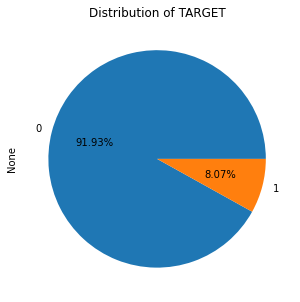

In [15]:
### The distribution of 'TARGET' is imbalanced
plt.title("Distribution of TARGET")
print(application_train['TARGET'].value_counts())
application_train.groupby('TARGET').size().plot(kind='pie', autopct='%1.2f%%', figsize=(5, 5))

Counts of labels:
 F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


<AxesSubplot:title={'center':'Distribution of CODE_GENDER'}, ylabel='None'>

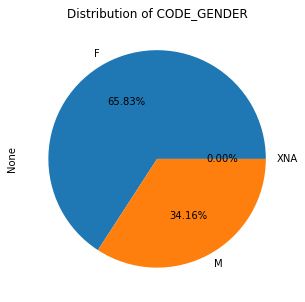

In [16]:
### The distribution of 'CODE_GENDER' (the gender of applicants)
plt.title("Distribution of CODE_GENDER")
print("Counts of labels:\n", application_train['CODE_GENDER'].value_counts())
application_train.groupby('CODE_GENDER').size().plot(kind='pie', autopct='%1.2f%%', figsize=(5, 5))

## One-hot encoding <a name="point3"></a>

In [17]:
### One-hot encoding for categorical columns
columns_for_OHE = []
for feature in categorical_columns:
    try:
        if str(sorted(list(application_train[feature].unique()))) == str([0, 1]):
            continue
        columns_for_OHE.append(feature)
        print("Counts of",  feature + ":")
        print(application_train[feature].value_counts(), "\n")
    except Exception as e:
        print(e)
        columns_for_OHE.append(feature)
        print("Counts of",  feature + ":")
        print(application_train[feature].value_counts(), "\n")
print("All columns that need one-hot encoding:")
print(columns_for_OHE)

Counts of REGION_RATING_CLIENT:
2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64 

Counts of REGION_RATING_CLIENT_W_CITY:
2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64 

Counts of NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 

Counts of CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 

Counts of FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 

Counts of FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64 

'<' not supported between instances of 'float' and 'str'
Counts of NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64 

Counts of NAME_INCOME_TYPE:
Working                 158774
Commerc

In [18]:
len(bureau['SK_ID_CURR'].unique())

305811

In [19]:
### Removing outliers

### DAYS features
application_train['DAYS_EMPLOYED'][application_train['DAYS_EMPLOYED'] == 365243] = np.nan
application_test['DAYS_EMPLOYED'][application_test['DAYS_EMPLOYED'] == 365243] = np.nan

#other features
application_train['OBS_30_CNT_SOCIAL_CIRCLE'][application_train['OBS_30_CNT_SOCIAL_CIRCLE'] > 30] == np.nan
application_train['OBS_60_CNT_SOCIAL_CIRCLE'][application_train['OBS_60_CNT_SOCIAL_CIRCLE'] > 30] == np.nan

application_test['OBS_30_CNT_SOCIAL_CIRCLE'][application_test['OBS_30_CNT_SOCIAL_CIRCLE'] > 30] == np.nan
application_test['OBS_60_CNT_SOCIAL_CIRCLE'][application_test['OBS_60_CNT_SOCIAL_CIRCLE'] > 30] == np.nan

application_train = application_train[application_train['CODE_GENDER'] != 'XNA'] # Remove rows with 'XNA' as 'CODE_GENDER'
application_test = application_test[application_test['CODE_GENDER'] != 'XNA']

Number of columns having NaN values: 68 columns


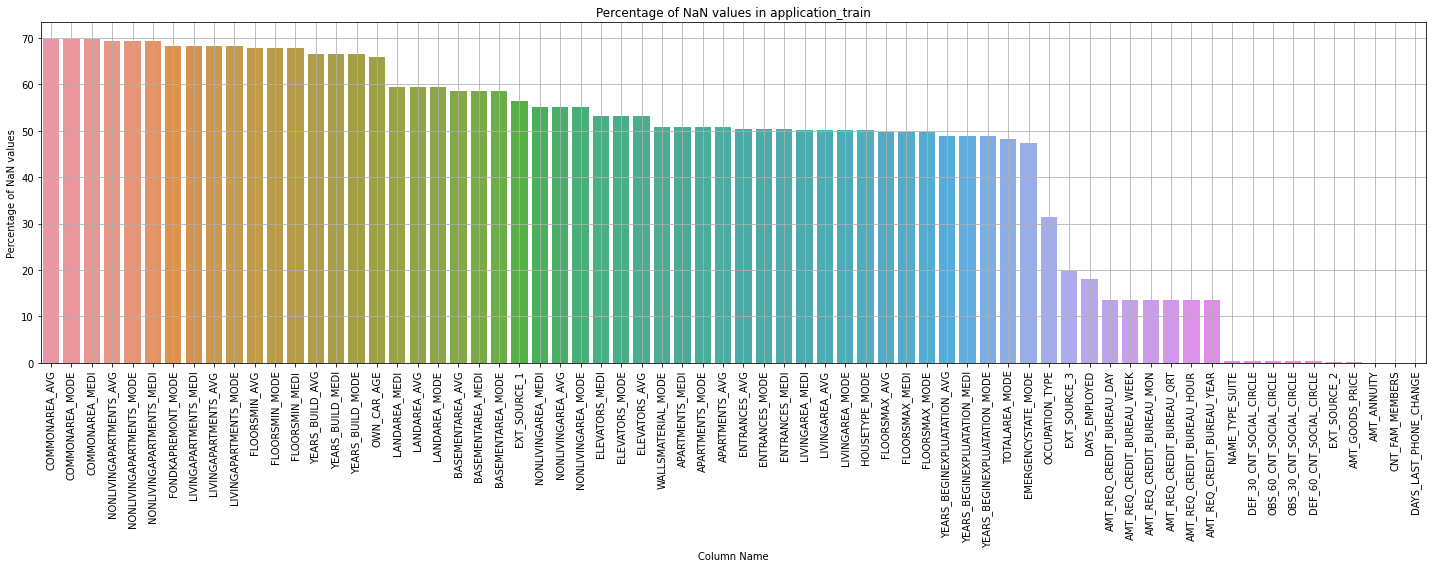

In [20]:
plot_nan_percent(nan_df_create(application_train), 'application_train', grid = True)

In [23]:
def feature_check(df,col_index,ax_counter):
    
    col_name=application_train.columns[col_index]
    ax=fig.add_subplot(25, 5, ax_counter)
    
    if col_name =='SK_ID_CURR' or col_name =='TARGET':
        return "invaild input"
    
    if type(application_train.iloc[0, col_index])==str:
        sns.catplot(data=application_train.iloc[:, [1,col_index]], x='TARGET',col=application_train.columns[col_index], kind="count")
    else:
        sns.kdeplot(df[df['TARGET']==0][col_name], label = 'TARGET == 0',ax=ax)
        sns.kdeplot(df[df['TARGET']==1][col_name], label = 'TARGET == 1',ax=ax)
        ax_counter+=1
        ax.set_ylabel('density')
        ax.set_title(col_name)
    
    return ax_counter

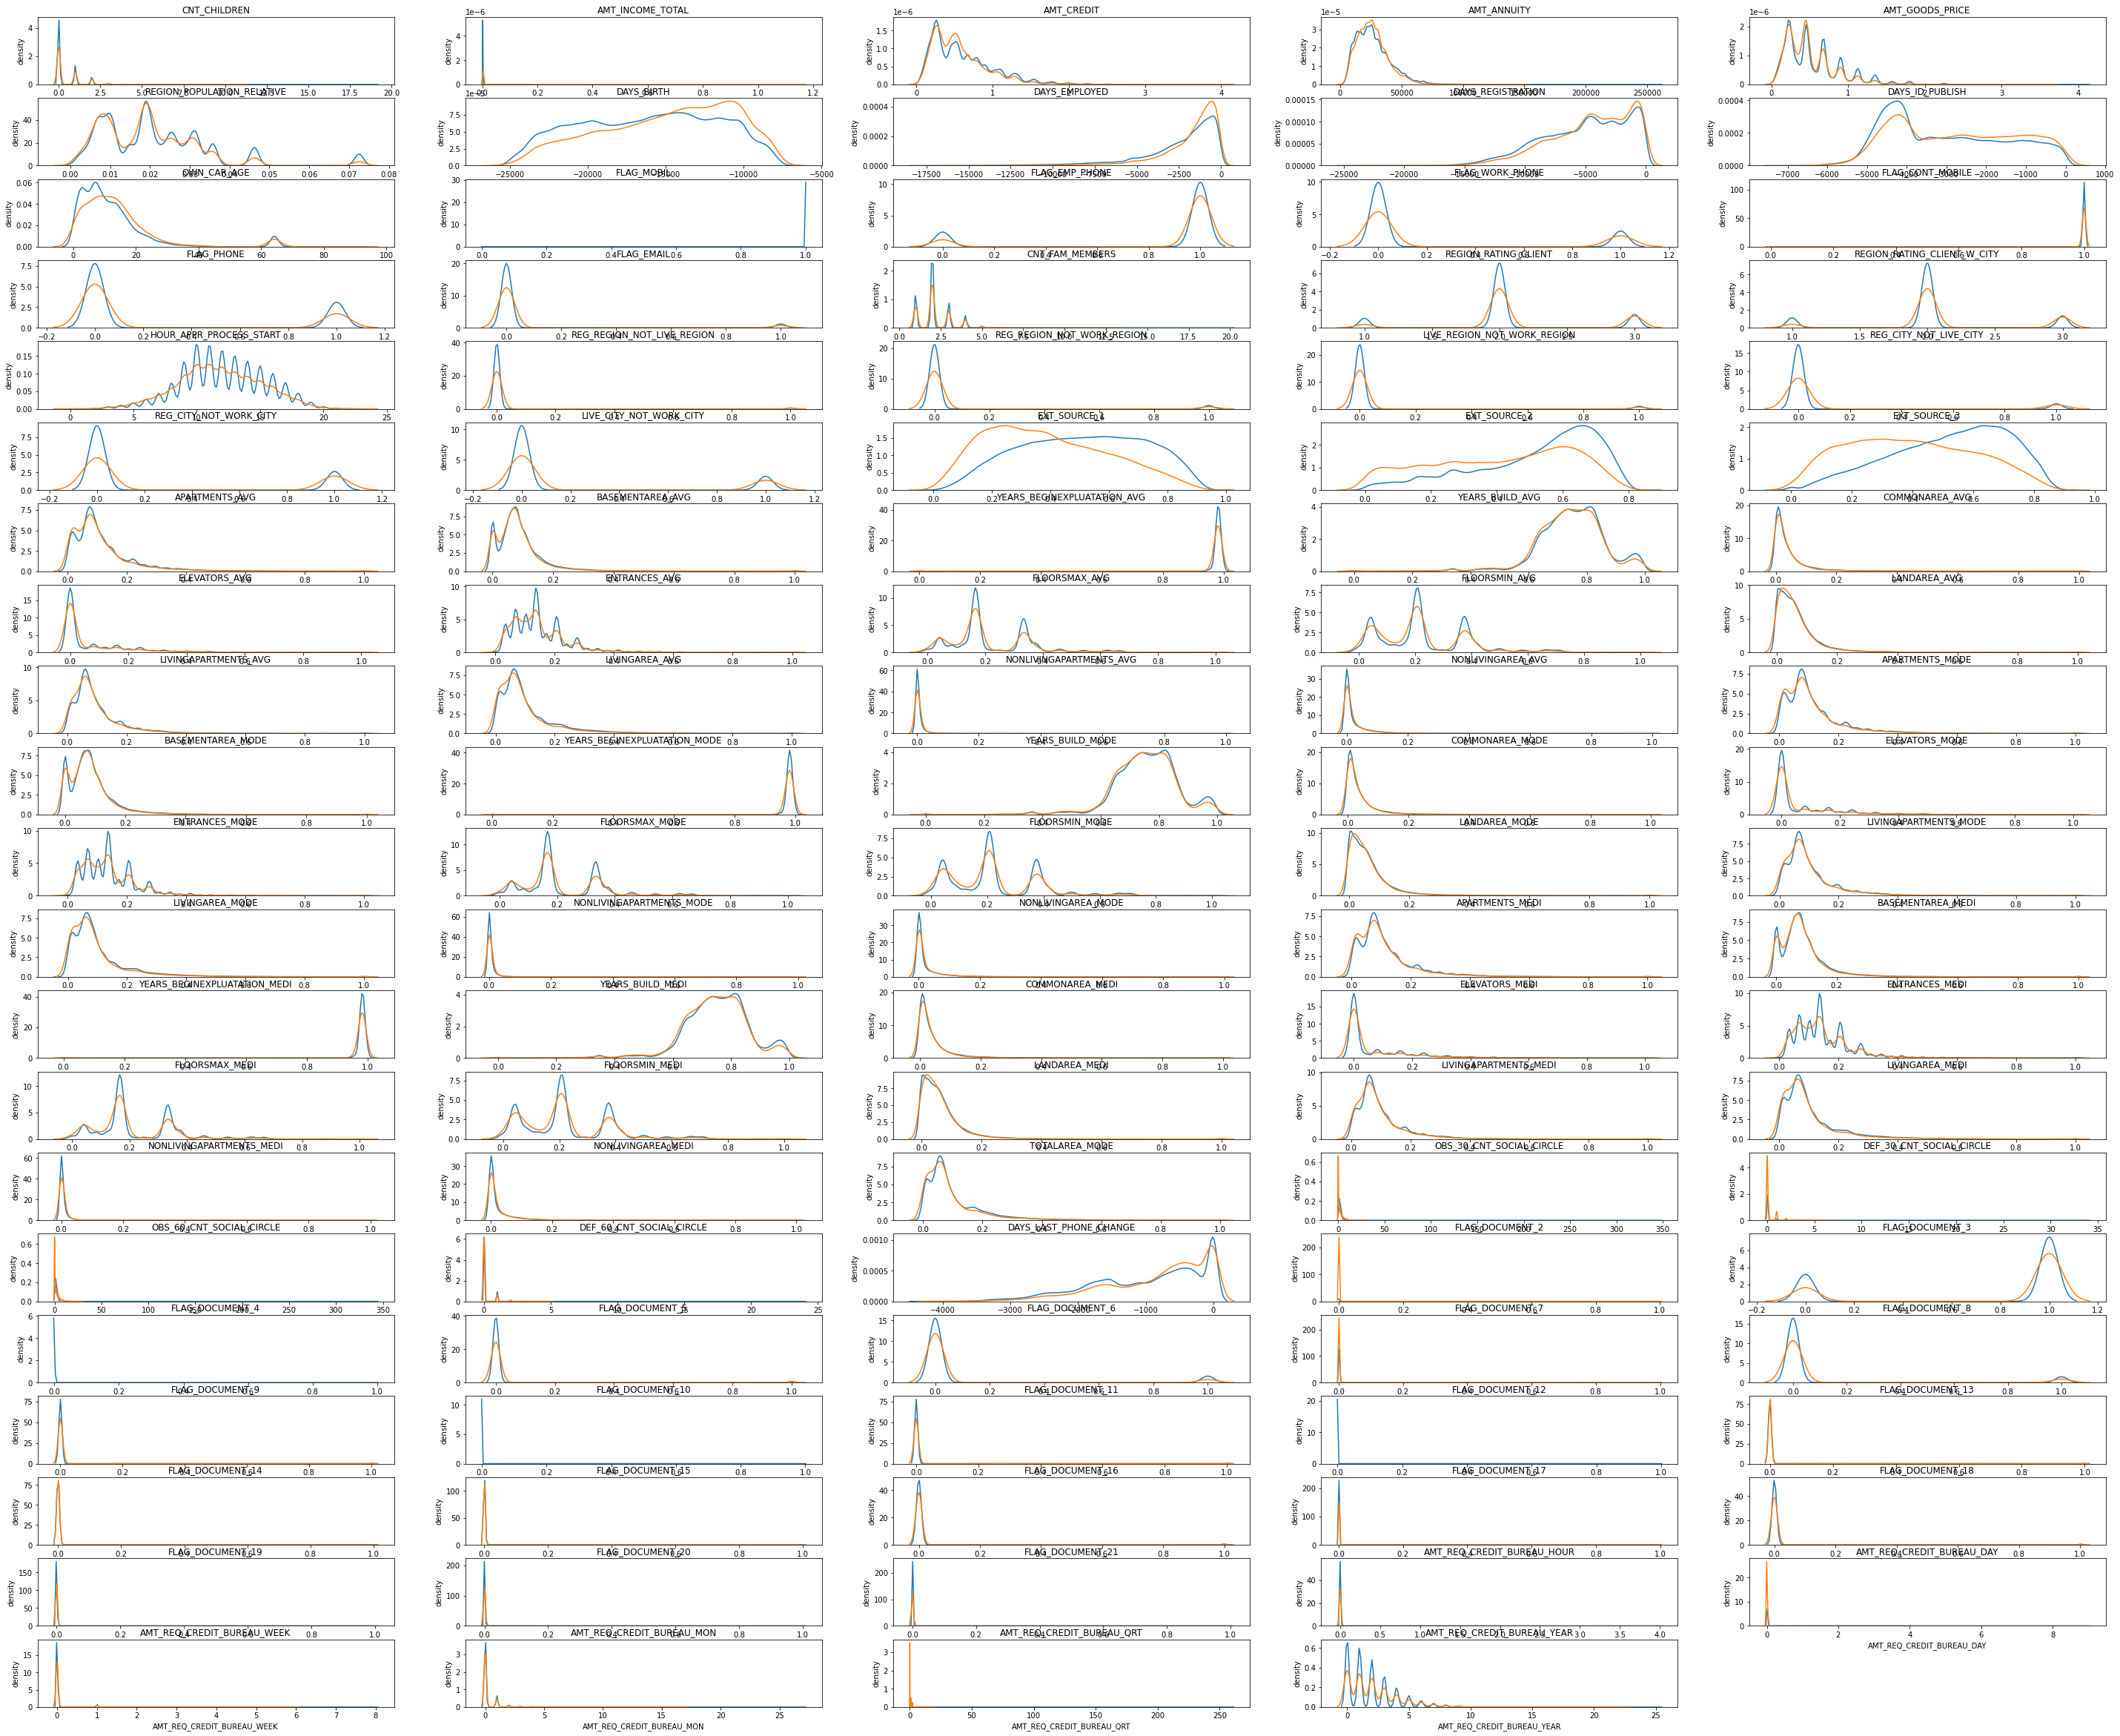

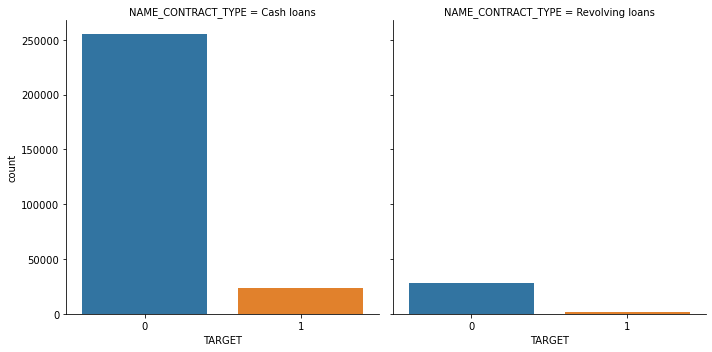

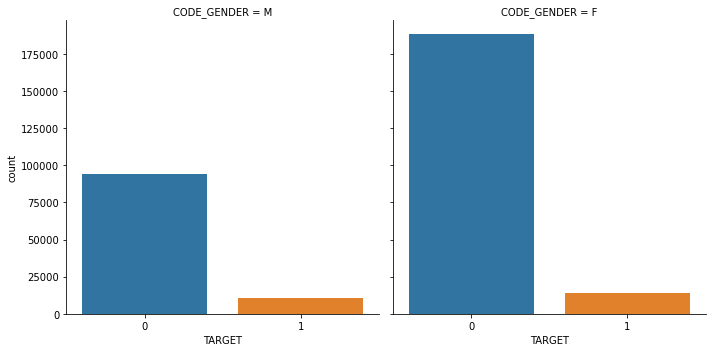

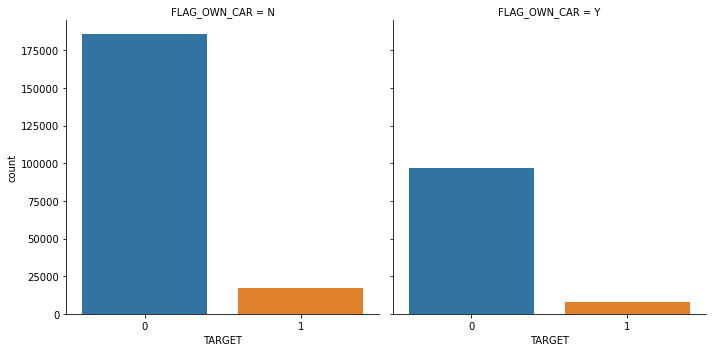

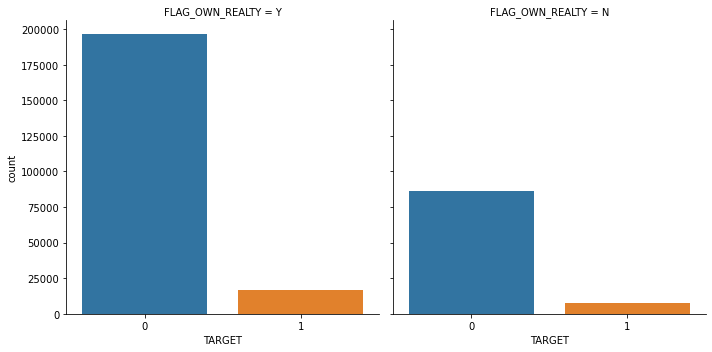

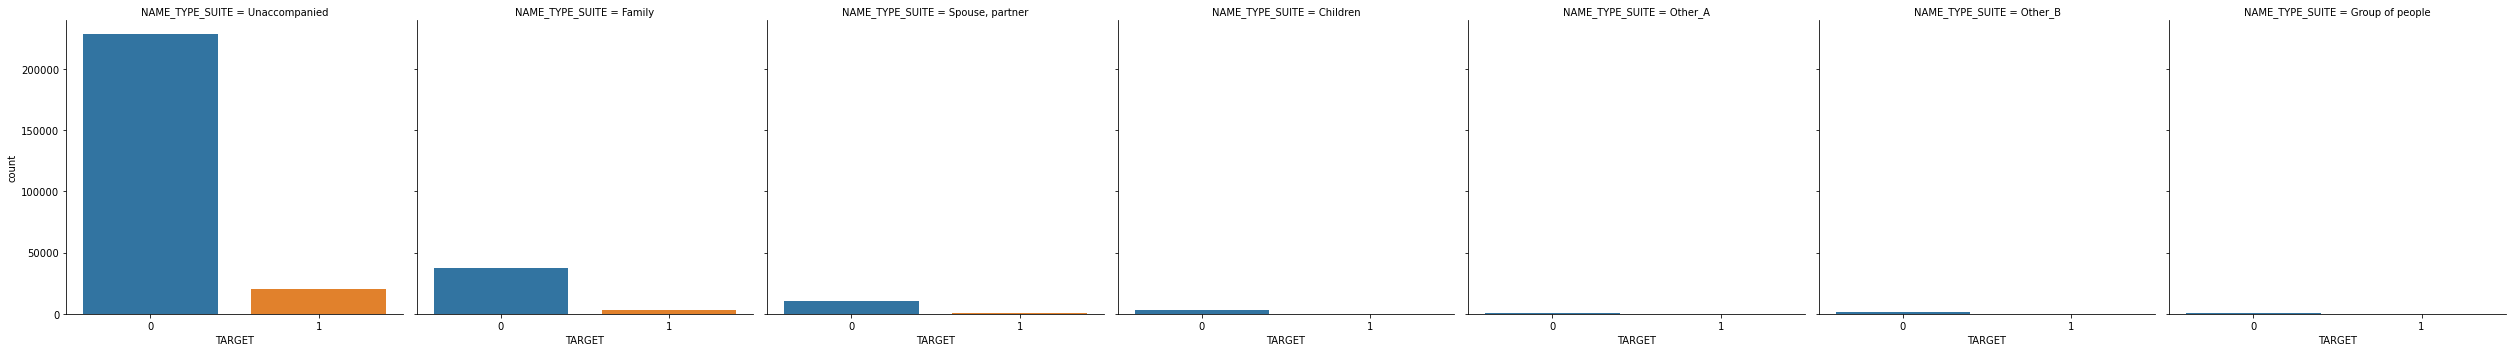

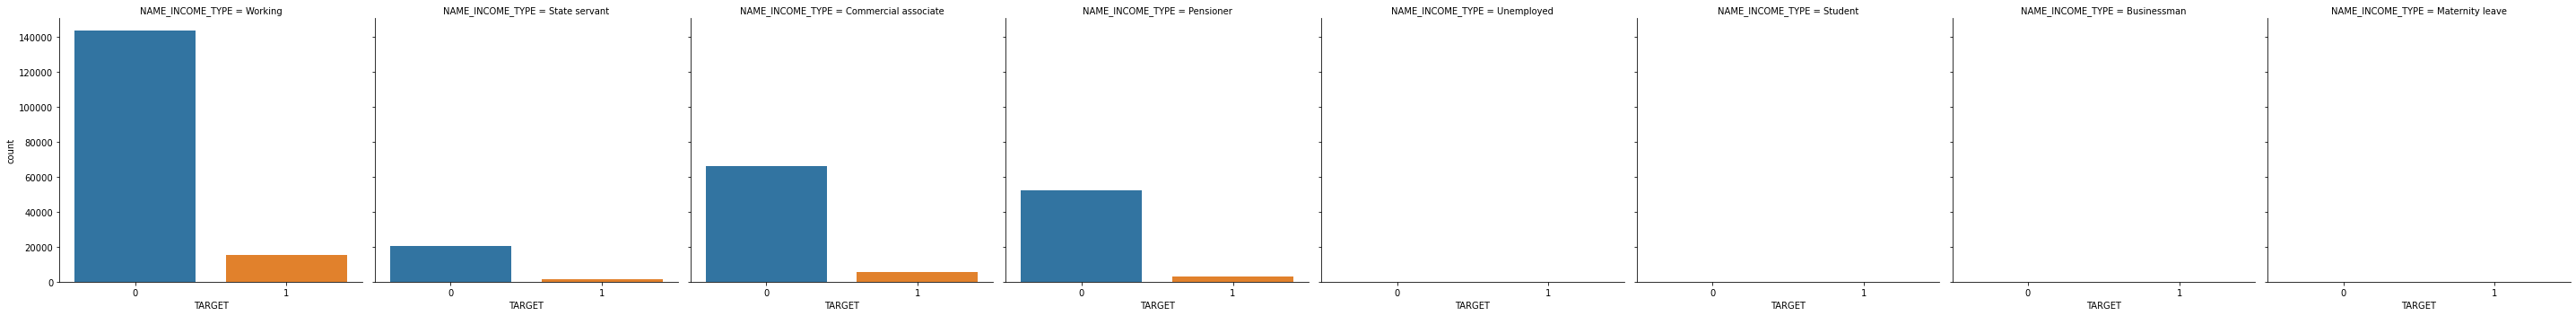

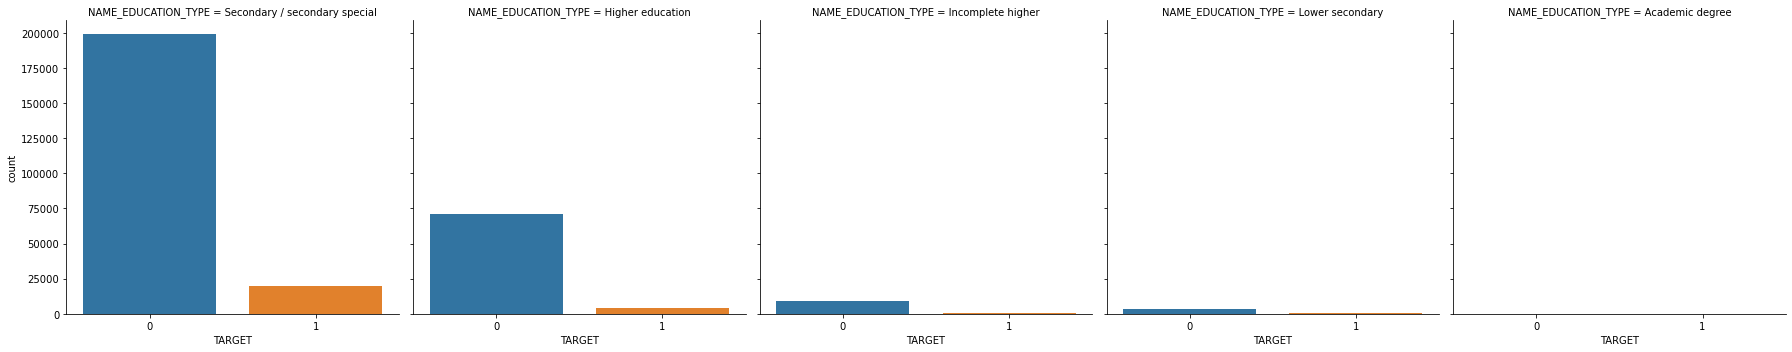

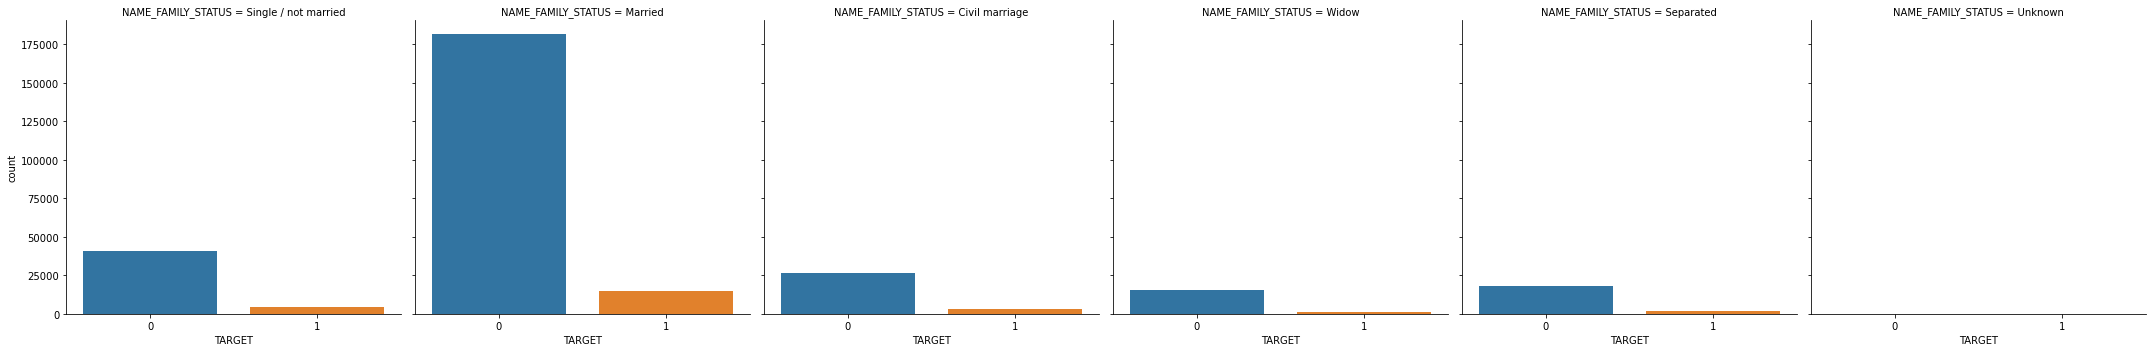

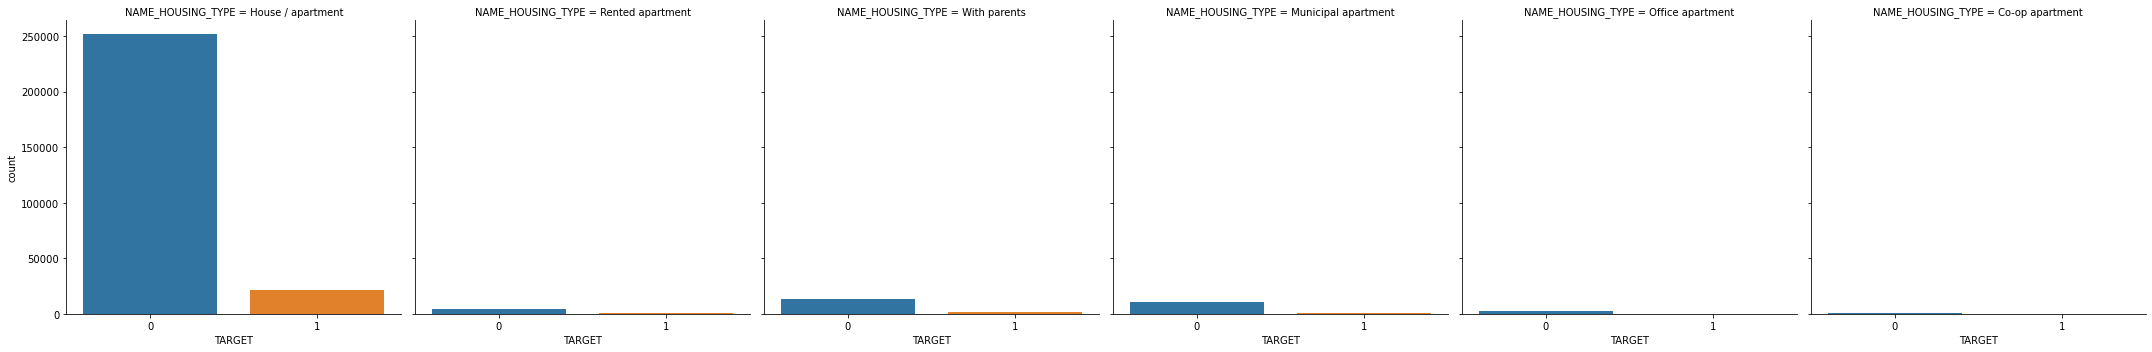

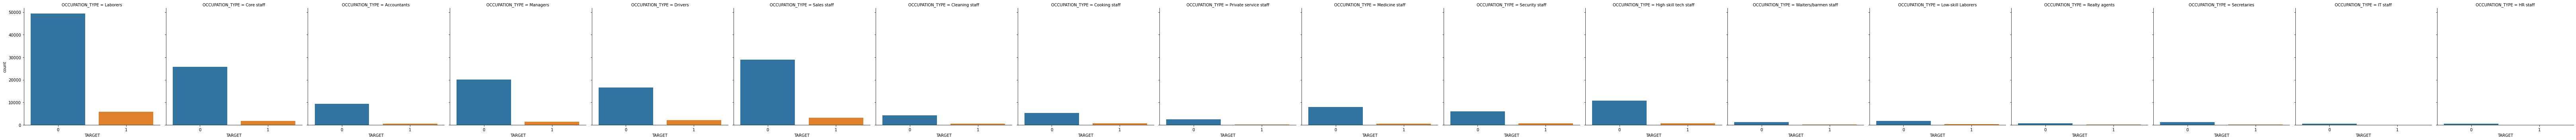

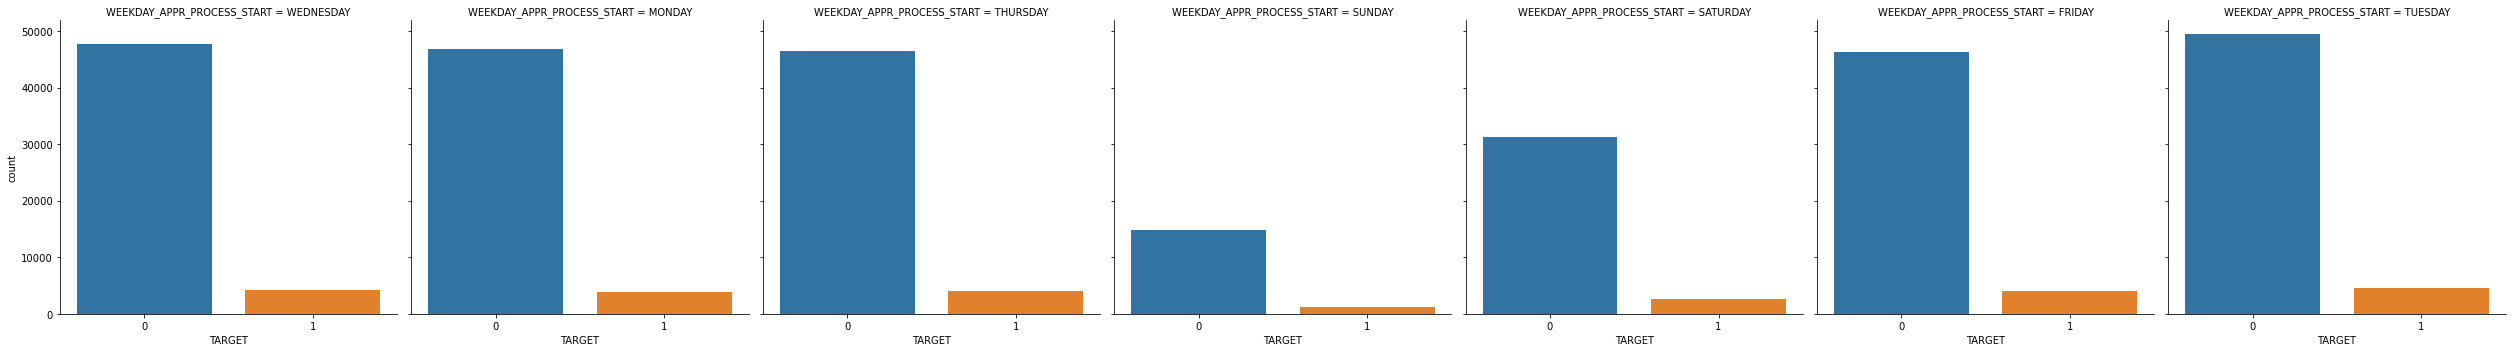

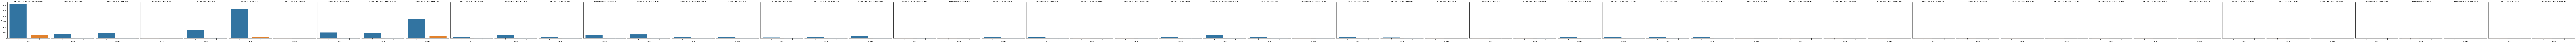

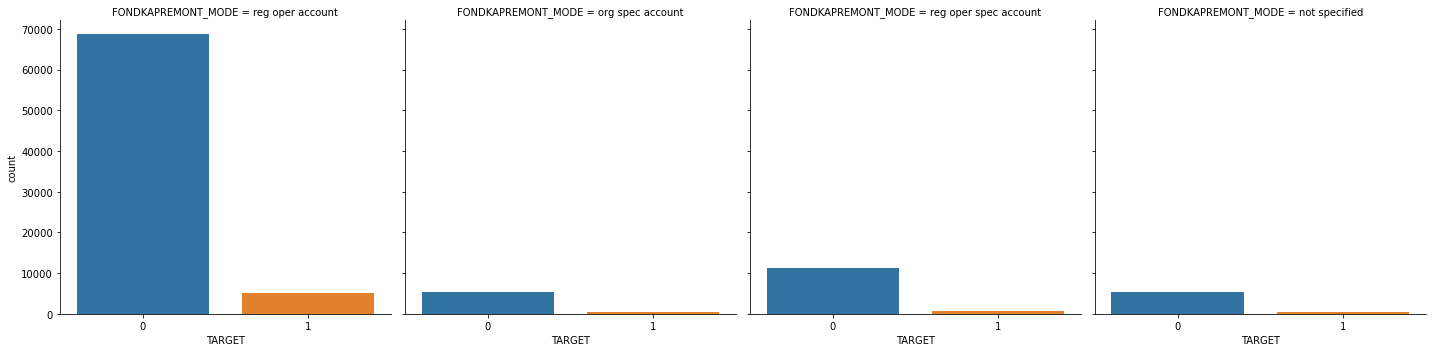

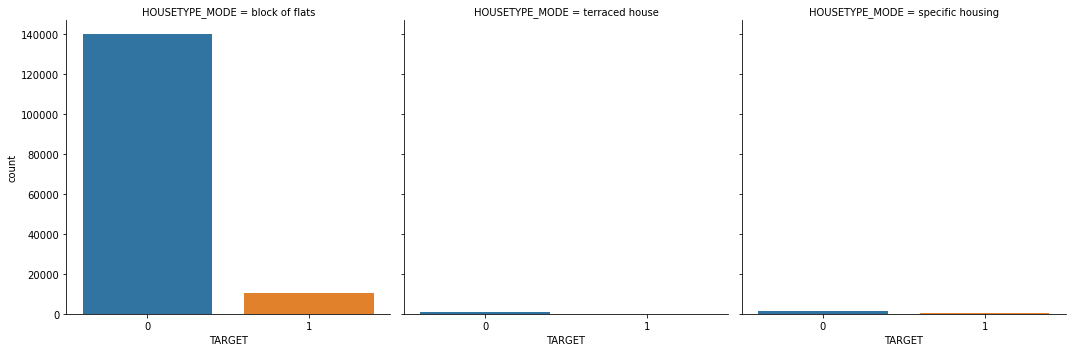

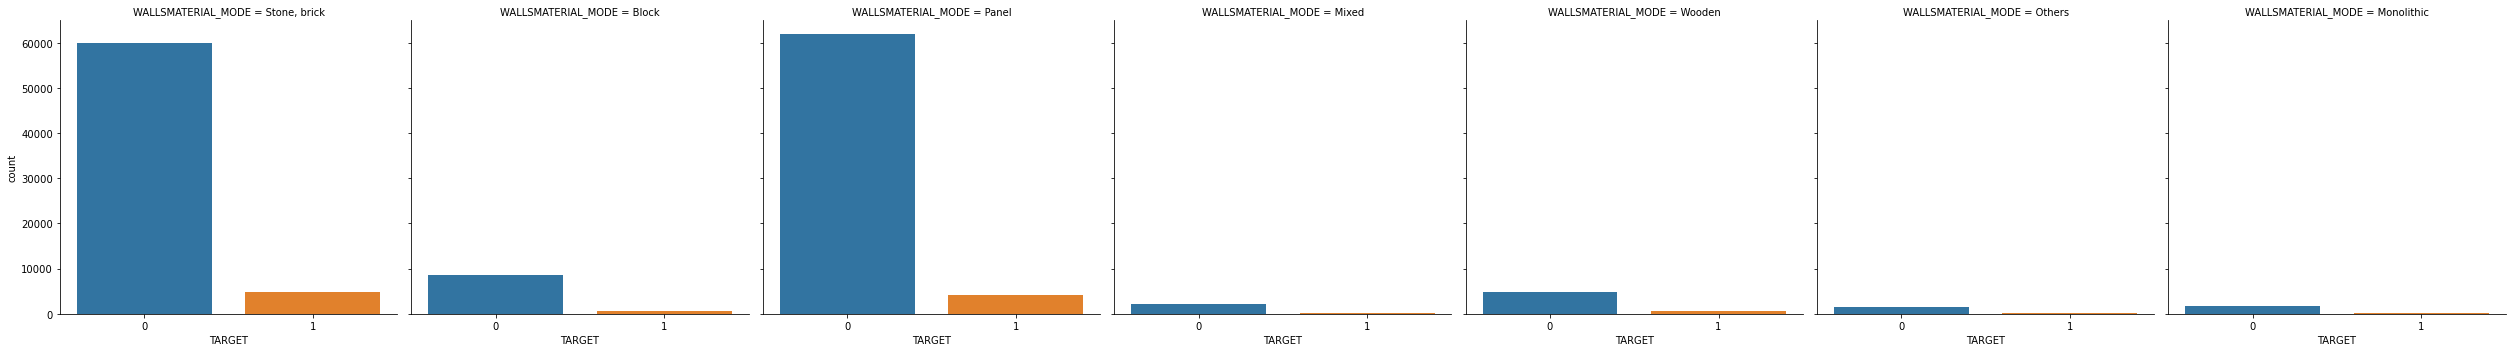

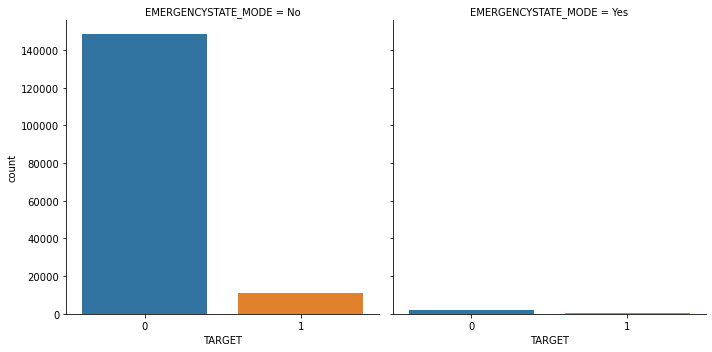

In [24]:
fig = plt.figure(figsize=(50,50))
ax_counter=1
for i in range(1, 121):
    ax_counter=feature_check(application_train,i+1, ax_counter)


In [25]:
### One-hot encoding
application_train = pd.get_dummies(application_train, prefix=None, prefix_sep='_', dummy_na=False, 
                                   columns=columns_for_OHE, sparse=False, drop_first=True, dtype=None)
application_test = pd.get_dummies(application_test, prefix=None, prefix_sep='_', dummy_na=False, 
                                   columns=columns_for_OHE, sparse=False, drop_first=True, dtype=None)
print("New shape of training data:", application_train.shape)
application_train.head()

New shape of training data: (307507, 231)


SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0         -637.0            -3648.0            -2120          NaN           1   
1        -1188.0            -1186.0             -291          NaN           1   
2         -225.0            -4260.0            -2531         26.0           1   
3        -3039.0            -9833.0            -2437          NaN           1   
4        -3038.0            -4311.0            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0              1.0                       10                           0   
1              2.0                       11                           0   
2              1.0                        9                           0   
3              2.0                       17                           0   
4              1.0                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   
3           NaN      0.650442           NaN             NaN               NaN   
4           NaN      0.322738           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   
3                          NaN              NaN             NaN   
4                          NaN              NaN       

In [35]:
print("New shape of testing data:", application_test.shape)
application_test.head()

New shape of testing data: (48744, 229)


SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100001             0          135000.0    568800.0      20560.5   
1      100005             0           99000.0    222768.0      17370.0   
2      100013             0          202500.0    663264.0      69777.0   
3      100028             2          315000.0   1575000.0      49018.5   
4      100038             1          180000.0    625500.0      32067.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         450000.0                    0.018850      -19241        -2329.0   
1         180000.0                    0.035792      -18064        -4469.0   
2         630000.0                    0.019101      -20038        -4458.0   
3        1575000.0                    0.026392      -13976        -1866.0   
4         625500.0                    0.010032      -13040        -2191.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -5170.0             -812          NaN           1   
1            -9118.0            -1623          NaN           1   
2            -2175.0            -3503          5.0           1   
3            -2000.0            -4208          NaN           1   
4            -4000.0            -4262         16.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           0           1   
1               1                0                 1           0           0   
2               1                0                 1           0           0   
3               1                0                 1           1           0   
4               1                1                 1           0           0   

   CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0              2.0                       18                           0   
1              2.0                        9                           0   
2              2.0                       14                           0   
3              4.0                       11                           0   
4              3.0                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.752614      0.789654      0.159520          0.0660            0.0590   
1      0.564990      0.291656      0.432962             NaN               NaN   
2           NaN      0.699787      0.610991             NaN               NaN   
3      0.525734      0.509677      0.612704          0.3052            0.1974   
4      0.202145      0.425687           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9732              NaN             NaN   
1                          NaN              NaN             NaN   
2                          NaN              NaN             NaN   
3                       0.9970           0.9592          0.1165   
4                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  F

In [26]:
num_unique_values = application_train.nunique().sort_values().to_frame(name='Number of distinct values')
num_unique_values.reset_index(level=0, inplace=True)
num_unique_values.rename({'index': 'Feature'}, axis=1, inplace=True)
num_unique_values.head()

Feature  Number of distinct values
0             NAME_TYPE_SUITE_Other_B                          2
1            OCCUPATION_TYPE_Laborers                          2
2  OCCUPATION_TYPE_Low-skill Laborers                          2
3            OCCUPATION_TYPE_Managers                          2
4      OCCUPATION_TYPE_Medicine staff                          2

In [27]:
### Fill all NaN with 0 and create columns indicating the NaN for training data
for col in application_train.columns:
    if application_train[col].isnull().values.any():
        print(col)
        # print(application_train.head())
        application_train[col+'_NaN'] = application_train[col].isnull()*1
        # print(application_train.head())
application_train = application_train.replace(np.nan,0)
application_train.head()

AMT_ANNUITY
AMT_GOODS_PRICE
DAYS_EMPLOYED
OWN_CAR_AGE
CNT_FAM_MEMBERS
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
TOTALAREA_MODE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CRE

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0         -637.0            -3648.0            -2120          0.0           1   
1        -1188.0            -1186.0             -291          0.0           1   
2         -225.0            -4260.0            -2531         26.0           1   
3        -3039.0            -9833.0            -2437          0.0           1   
4        -3038.0            -4311.0            -3458          0.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0              1.0                       10                           0   
1              2.0                       11                           0   
2              1.0                        9                           0   
3              2.0                       17                           0   
4              1.0                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246      0.000000          0.0959            0.0529   
2      0.000000      0.555912      0.729567          0.0000            0.0000   
3      0.000000      0.650442      0.000000          0.0000            0.0000   
4      0.000000      0.322738      0.000000          0.0000            0.0000   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                       0.0000           0.0000          0.0000   
3                       0.0000           0.0000          0.0000   
4                       0.0000           0.0000       

In [28]:
### Fill all NaN with 0 and create columns indicating the NaN for testing data
for col in application_test.columns:
    if application_test[col].isnull().values.any():
        print(col)
        # print(application_test.head())
        application_test[col+'_NaN'] = application_test[col].isnull()*1
        # print(application_test.head())
application_test = application_test.replace(np.nan,0)
application_test.head()

AMT_ANNUITY
DAYS_EMPLOYED
OWN_CAR_AGE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
TOTALAREA_MODE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDI

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100001             0          135000.0    568800.0      20560.5   
1      100005             0           99000.0    222768.0      17370.0   
2      100013             0          202500.0    663264.0      69777.0   
3      100028             2          315000.0   1575000.0      49018.5   
4      100038             1          180000.0    625500.0      32067.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         450000.0                    0.018850      -19241        -2329.0   
1         180000.0                    0.035792      -18064        -4469.0   
2         630000.0                    0.019101      -20038        -4458.0   
3        1575000.0                    0.026392      -13976        -1866.0   
4         625500.0                    0.010032      -13040        -2191.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -5170.0             -812          0.0           1   
1            -9118.0            -1623          0.0           1   
2            -2175.0            -3503          5.0           1   
3            -2000.0            -4208          0.0           1   
4            -4000.0            -4262         16.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           0           1   
1               1                0                 1           0           0   
2               1                0                 1           0           0   
3               1                0                 1           1           0   
4               1                1                 1           0           0   

   CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0              2.0                       18                           0   
1              2.0                        9                           0   
2              2.0                       14                           0   
3              4.0                       11                           0   
4              3.0                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.752614      0.789654      0.159520          0.0660            0.0590   
1      0.564990      0.291656      0.432962          0.0000            0.0000   
2      0.000000      0.699787      0.610991          0.0000            0.0000   
3      0.525734      0.509677      0.612704          0.3052            0.1974   
4      0.202145      0.425687      0.000000          0.0000            0.0000   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9732           0.0000          0.0000   
1                       0.0000           0.0000          0.0000   
2                       0.0000           0.0000          0.0000   
3                       0.9970           0.9592          0.1165   
4                       0.0000           0.0000          0.0000   

   ELEVATORS_AVG  ENTRANCES_AVG  F

In [29]:
### matching columns of training and testing data
train_test_data = pd.concat([application_train, application_test])
application_train = train_test_data.head(application_train.shape[0])
application_test = train_test_data.tail(application_test.shape[0])
application_test.drop(['TARGET'], axis=1, inplace=True)

application_train = application_train.fillna(0)
application_test = application_test.fillna(0)

print("Shape of training data:", application_train.shape)
print("Shape of testing data:", application_test.shape)

Shape of training data: (307507, 294)
Shape of testing data: (48744, 293)


In [30]:
plot_nan_percent(nan_df_create(application_train), 'application_train', grid = True)

The dataframe application_train does not contain any NaN values.


In [31]:
plot_nan_percent(nan_df_create(application_test), 'application_test', grid = True)

The dataframe application_test does not contain any NaN values.


In [32]:
X = application_train.loc[:, application_train.columns != 'TARGET']
X = X.loc[:, X.columns != 'SK_ID_CURR']
y = application_train.loc[:, application_train.columns == 'TARGET']

In [43]:
X.head().shape

(5, 292)

In [44]:
y.head()

TARGET
0     1.0
1     0.0
2     0.0
3     0.0
4     0.0

In [33]:
XX = application_test.loc[:, application_test.columns != 'SK_ID_CURR']

In [34]:
### Sampling for imbalanced data
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['TARGET'])

### Check the numbers of our data
print("length of oversampled data is", len(os_data_X))
print("Number of TARGET 0 in oversampled data", len(os_data_y[os_data_y['TARGET']==0]))
print("Number of TARGET 1", len(os_data_y[os_data_y['TARGET']==1]))
print("Proportion of no subscription data in oversampled data is ", len(os_data_y[os_data_y['TARGET']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ", len(os_data_y[os_data_y['TARGET']==1])/len(os_data_X))

length of oversampled data is 395624
Number of TARGET 0 in oversampled data 197812
Number of TARGET 1 197812
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


## Model <a name="point4"></a>

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(os_data_X, os_data_y, test_size=0.1, random_state=50)

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred1=lr.predict_proba(X_valid)[:,1]
#bad model (All 0)(0.5)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10,random_state=101,min_samples_leaf=15)
dt.fit(X_train, y_train)
y_pred2=dt.predict_proba(X_valid)[:,1]

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10,random_state=101,min_samples_leaf=15)
rf.fit(X_train, y_train)
y_pred3=rf.predict_proba(X_valid)[:,1]
#bad model (All 0)
#~1min

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)
y_pred4=lda.predict_proba(X_valid)[:,1]

In [52]:
# fit KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred5=knn.predict_proba(X_valid)[:,1]

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.2)
gbc.fit(X_train, y_train)
y_pred6=gbc.predict_proba(X_valid)[:,1]
#~4min50s

In [52]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
y_pred7=xgbc.predict_proba(X_test)[:,1]
#~1min

[16:20:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
import lightgbm as lgb 

#lightgbm bug fixing lines
import re
X_new = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_new = y.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

    
X_train, X_valid, y_train, y_valid = train_test_split(X_new, y_new, test_size=0.1, random_state=50)

train_data = lgb.Dataset(data=X_train,label=y_train)
valid_data = lgb.Dataset(data=X_valid,label=y_valid)

params={'boosting': 'dart',
    'application': 'binary',
    'learning_rate': 0.01,
    'num_leaves': 34,
    'max_depth': 5,
    'feature_fraction': 0.9,
    'scale_pos_weight': 2,
    'reg_alpha': 0.05,
    'reg_lambda': 0.1,
    'verbose': -1}
model = lgb.train(params, train_data, 1000, valid_sets=[valid_data],verbose_eval = False)

y_pred8=model.predict(X_valid)
#~1min30s

In [37]:
#to kaggle output

#CHOOSE ONE you want to use

#y_pred=lr.predict_proba(XX)[:,1] #y_pred1
#y_pred=dt.predict_proba(XX)[:,1] #y_pred2
#y_pred=rf.predict_proba(XX)[:,1] #y_pred3
#y_pred=lda.predict_proba(XX)[:,1] #y_pred4
#y_pred=knn.predict_proba(XX)[:,1] #y_pred5
#y_pred=gbc.predict_proba(XX)[:,1] #y_pred6
y_pred=xgbc.predict_proba(XX)[:,1] #y_pred7
#y_pred=model.predict(XX) #y_pred8

ans=pd.DataFrame(y_pred)
ans.set_index(application_test['SK_ID_CURR'], inplace=True)
ans.columns=['TARGET']
ans.to_csv("/Users/quantamental/Downloads/home-credit-default-risk/ANS.csv")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

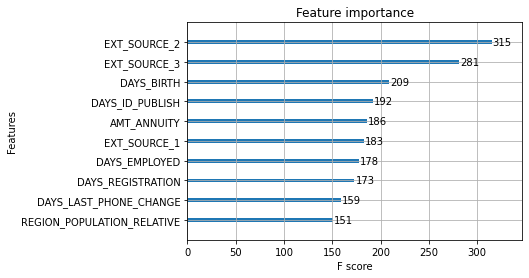

In [53]:
from xgboost import plot_importance
plot_importance(xgbc, max_num_features=10)

## ROC AUC <a name="point5"></a>

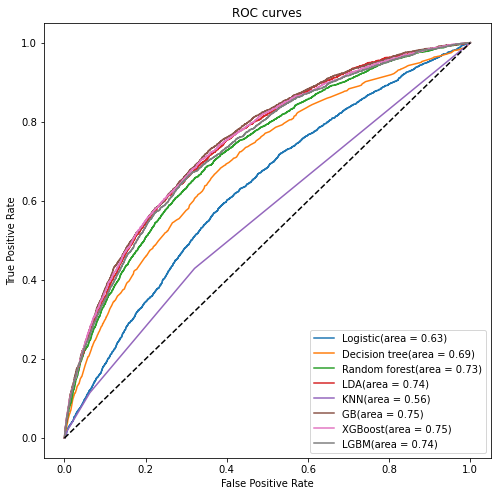

In [58]:
#reference: MAFS6010_Regression.ipynb
from sklearn.metrics import roc_curve, auc

#y_pred=model.predict(X_valid)

y_pred_array=[y_pred1,y_pred2,y_pred3,y_pred4,y_pred5,y_pred6,y_pred7,y_pred8]
title=['Logistic','Decision tree','Random forest','LDA','KNN','GB','XGBoost','LGBM']
fig, ax = plt.subplots(figsize=(8,8))

for i in range(8):
    false_pos_rate, true_pos_rate, _ = roc_curve(y_valid, y_pred_array[i])
    roc_auc = auc(false_pos_rate, true_pos_rate)
    ax.plot(false_pos_rate, true_pos_rate, label=title[i]+'(area = %0.2f)' % roc_auc)

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curves')
ax.legend(loc="lower right")